HOUSE PRICES

Compétition:

    But
Il vous appartient de prévoir le prix de vente de chaque maison. Pour chaque identifiant de l'ensemble de test, vous devez prédire la valeur de la variable SalePrice. 

Métrique
Les soumissions sont évaluées sur Root-Mean-Squared-Error (RMSE)  entre le logarithme de la valeur prédite et le logarithme du prix de vente observé. (Prendre des journaux signifie que les erreurs de prédiction des maisons chères et des maisons bon marché affecteront le résultat de la même manière.)

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config 
set_config(display='diagram')

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from statistics import *
import pylab 
import scipy.stats as stats

from sklearn.compose import make_column_transformer

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

# Dataclean / Dataviz

## Vue d'ensemble

In [27]:
data= pd.read_csv('train.csv')

In [28]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Valeurs manquantes

In [6]:
data.isnull().sum().sort_values(ascending=False).head(17) *100/len(data)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
dtype: float64

In [7]:
data.drop(["Alley","MiscFeature","Fence","PoolQC","FireplaceQu"],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [8]:
X=data.drop(columns=['Id','SalePrice'])
y=data["SalePrice"]

In [9]:
print(data.shape)
print(X.shape)
print(y.shape)

(1460, 81)
(1460, 79)
(1460,)


In [10]:
X.dtypes.value_counts()

object     43
int64      33
float64     3
dtype: int64

On regarde la répartition de notre X et de y, pour vérifier:
- la suppréssion de la colonne Id + SalePrice dans X
- le nombre de ligne dans y et aucune colonne

# Valeurs uniques

<AxesSubplot:>

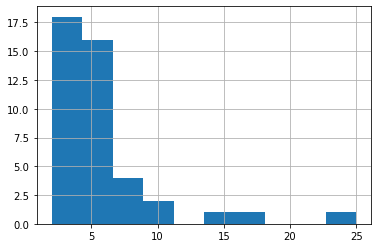

In [11]:
X.select_dtypes(include=['object']).nunique().hist()

L'histogramme montre une découpe en 3 parties:
- Il définit les zones où les modalitées sont multiples


In [29]:
X.select_dtypes(include=['object']).nunique().sum()

252

In [30]:
X.select_dtypes(include=['object']).nunique()<=5
features_cat_all=pd.DataFrame(X.select_dtypes(include=['object']).nunique()<=5)
len(list(features_cat_all [features_cat_all[0]==True].index))

27

In [14]:
features_cat_small= list(features_cat_all[features_cat_all [0]==True].index)
features_cat_small

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature']

features_cat_small, correspond à la liste des features où le nombre de condition est inférieur à 5

# Les valeurs catégorielles

In [15]:
feature_numerique=list(X.select_dtypes(include=['object']).columns)
#feature_numerique

# Selection des features numériques

In [16]:
feature_numerique=list(X.select_dtypes(include=['int64','float64']).columns)
#feature_numerique

In [17]:
# Pré-sélection de certaines variables
data = data[['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'PoolArea', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'OverallQual', 'SalePrice']]
data.isna().sum()

LotArea         0
TotalBsmtSF     0
GrLivArea       0
GarageArea      0
PoolArea        0
Neighborhood    0
HouseStyle      0
Exterior1st     0
OverallQual     0
SalePrice       0
dtype: int64

# Data viz

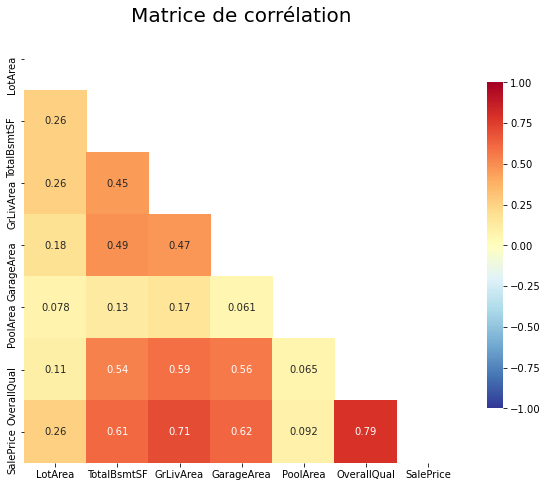

In [18]:
# Matrice de corrélation - heatmap
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, vmin=-1,cmap='RdYlBu_r', vmax=1, square=True,
            cbar_kws={"shrink": .75}, annot=True).set_title('Matrice de corrélation', fontsize=20);

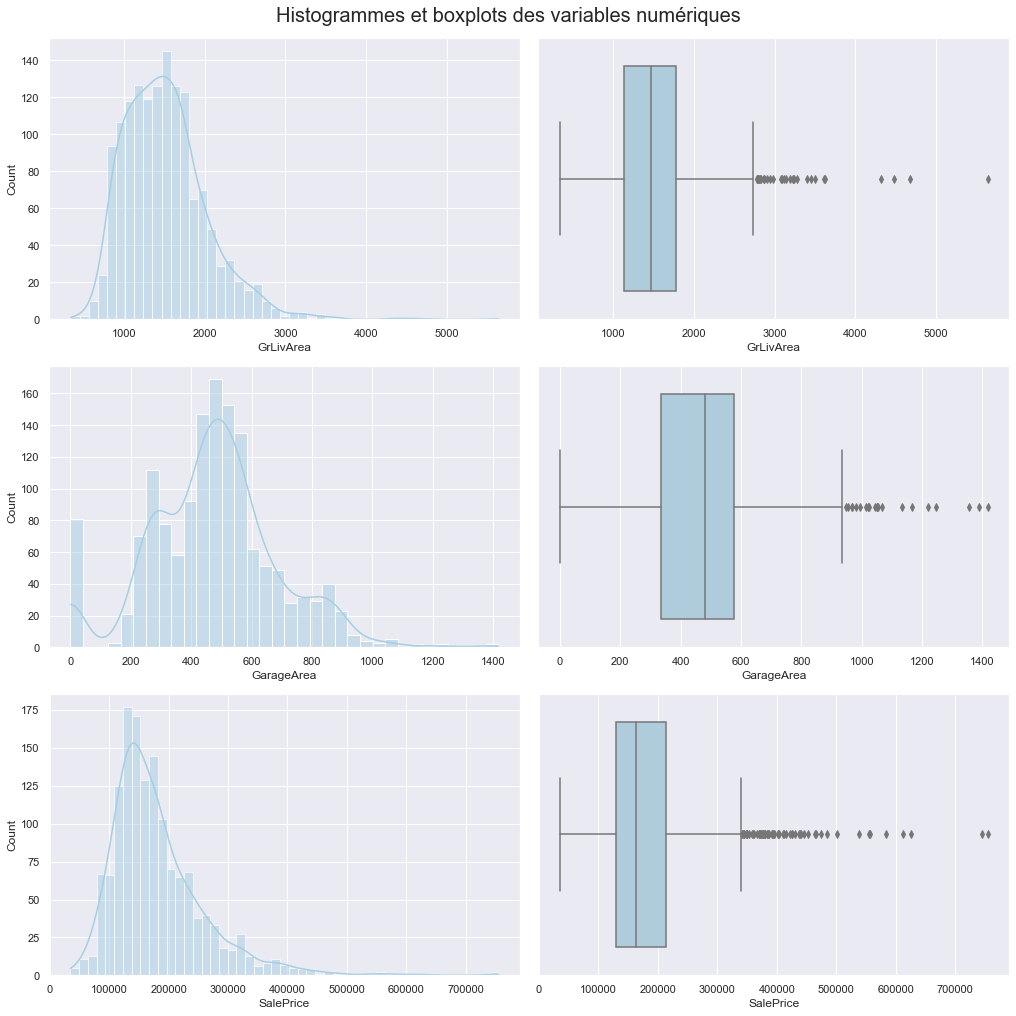

In [19]:
# Dataviz des variables numériques - histplots et boxplots
def plot_variables(df, variables_list):  
    sns.set()
    sns.set_palette("Paired")
    fig, axes = plt.subplots(nrows=len(variables_list), ncols=2, figsize=(14,14), constrained_layout=True)
    for i, variable in enumerate(variables_list): 
        sns.histplot(data = df, x=variable, kde = True,   ax=axes[i,0])
        sns.boxplot(data = df, x=variable, ax=axes[i,1])
    fig.suptitle('Histogrammes et boxplots des variables numériques', fontsize=20)
    plt.show()

variables_list = ['GrLivArea', 'GarageArea', 'SalePrice']  
plot_variables(data, variables_list)

# Outliers 

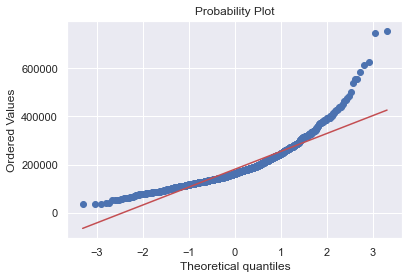

In [20]:
# Distribution des résidus (qqplot)
import pylab 
import scipy.stats as stats

stats.probplot(data["SalePrice"], dist="norm", plot=pylab)
pylab.show()

# Préprocessing

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnsTransformer

On peut lire les catégories et le nombre de feature par catégorie

# Mise en place du modèle

## Entrainement avec variables numériques

In [23]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (1168, 79)
Test set: (292, 79)


In [ ]:
<br/>